In [65]:
import requests
import bs4
import shutil

In [66]:
url = "https://www.worldometers.info/geography/alphabetical-list-of-countries/"
response = requests.get(url)

htmlcontent = response.content
soup = bs4.BeautifulSoup(htmlcontent,'html.parser')
cou = []
pop= []
are = []
density = []

In [68]:
ab = soup.find_all('div',attrs={'class':'content-inner'})
for i in ab:
    kt = (i.find_all('td',attrs={'style':'font-weight: bold; font-size:15px'}))
    for j in kt:
        #print(j.text)
        cou.append(j.text)

for i in ab:
    kp = i.find_all('a')
    for k in kp:
        #print(k.text)
        if len(k.text)>1:
            pop.append(int(k.text.replace(',','')))
            
for i in ab:            
    ka = i.find_all('td',attrs ={'style':'text-align:right'})
    for q in ka:
        are.append(q.text)
aker = []
for j in range(195):
    aker.append([cou[j],pop[j],are[j*2],are[2*j+1]])
len(are)

390

<BarContainer object of 5 artists>

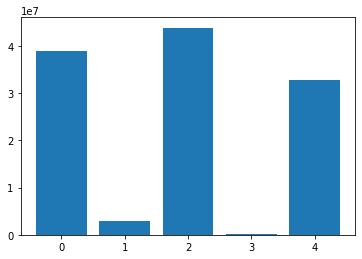

In [93]:
abc = cou[:5]
bcd = pop[:5]
den = [60,105,18,164,26]
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ypos = np.arange(len(abc))
plt.bar(ypos,bcd,width = 0.8)


<BarContainer object of 5 artists>

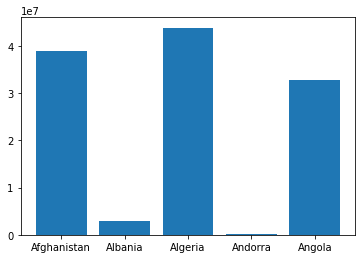

In [94]:
plt.xticks(ypos,abc)
plt.bar(ypos,bcd,width=0.8)

In [53]:
import pandas as pd
df = pd.DataFrame(aker,columns=['country_name','population','area','density'])
df

,country_name,population,area,density
0,Afghanistan,"38,928,346","652,860",60
1,Albania,"2,877,797","27,400",105
2,Algeria,"43,851,044","2,381,740",18
3,Andorra,"77,265",470,164
4,Angola,"32,866,272","1,246,700",26
...,...,...,...,...
190,Venezuela,"28,435,940","882,050",32
191,Vietnam,"97,338,579","310,070",314
192,Yemen,"29,825,964","527,970",56
193,Zambia,"18,383,955","743,390",25


In [54]:
df.to_csv('countries_detail.csv',index=False)